# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [51]:
dado = pd.read_csv('dados.csv')
dado.head()

,Unnamed: 0,mau,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,False,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,1,False,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,2,False,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,3,False,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
4,4,False,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0


In [52]:
d = dado.drop('Unnamed: 0', axis=1)

In [37]:
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              16650 non-null  int64
 1   mau                                     16650 non-null  bool 
 2   tipo_renda_Pensioner                    16650 non-null  int64
 3   tipo_renda_State servant                16650 non-null  int64
 4   tipo_renda_Student                      16650 non-null  int64
 5   tipo_renda_Working                      16650 non-null  int64
 6   educacao_Higher education               16650 non-null  int64
 7   educacao_Incomplete higher              16650 non-null  int64
 8   educacao_Lower secondary                16650 non-null  int64
 9   educacao_Secondary / secondary special  16650 non-null  int64
 10  estado_civil_Married                    16650 non-null  int64
 11  estado_civil_Se

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=.70, test_size=.30, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [49]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [53]:
d.mau.unique()

array([False,  True])

In [54]:
d.mau = d.mau.map({False: 1, True:0})

In [55]:
d.mau.unique()

array([1, 0], dtype=int64)

In [60]:
y = d.mau

In [57]:
X = d.drop('mau', axis=1)

In [58]:
X.head()

,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0


In [61]:
y

0        1
1        1
2        1
3        1
4        1
        ..
16645    0
16646    0
16647    0
16648    0
16649    0
Name: mau, Length: 16650, dtype: int64

In [64]:
X[['estado_civil_Married']]

,estado_civil_Married
0,1
1,0
2,0
3,1
4,1
...,...
16645,0
16646,1
16647,1
16648,1


In [65]:
clf = clf.fit(X[['estado_civil_Married']], y)

In [67]:
d.mau.value_counts()

1    16260
0      390
Name: mau, dtype: int64

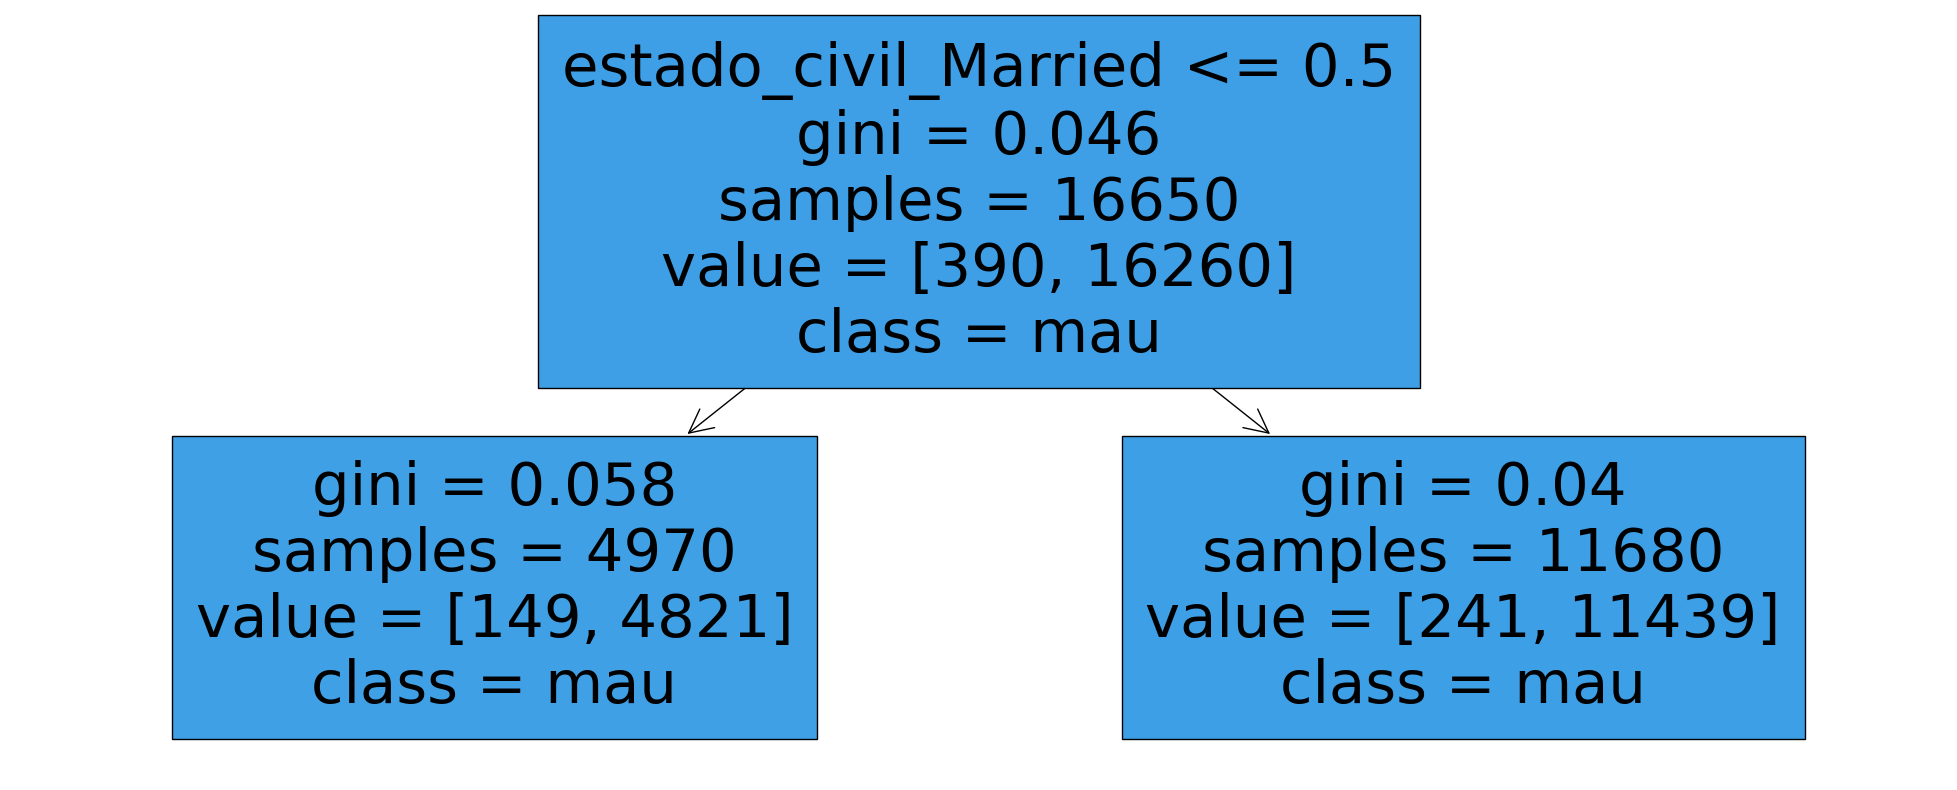

In [77]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['estado_civil_Single / not married', 'mau'],
          feature_names=['estado_civil_Married']);

In [80]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [81]:
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

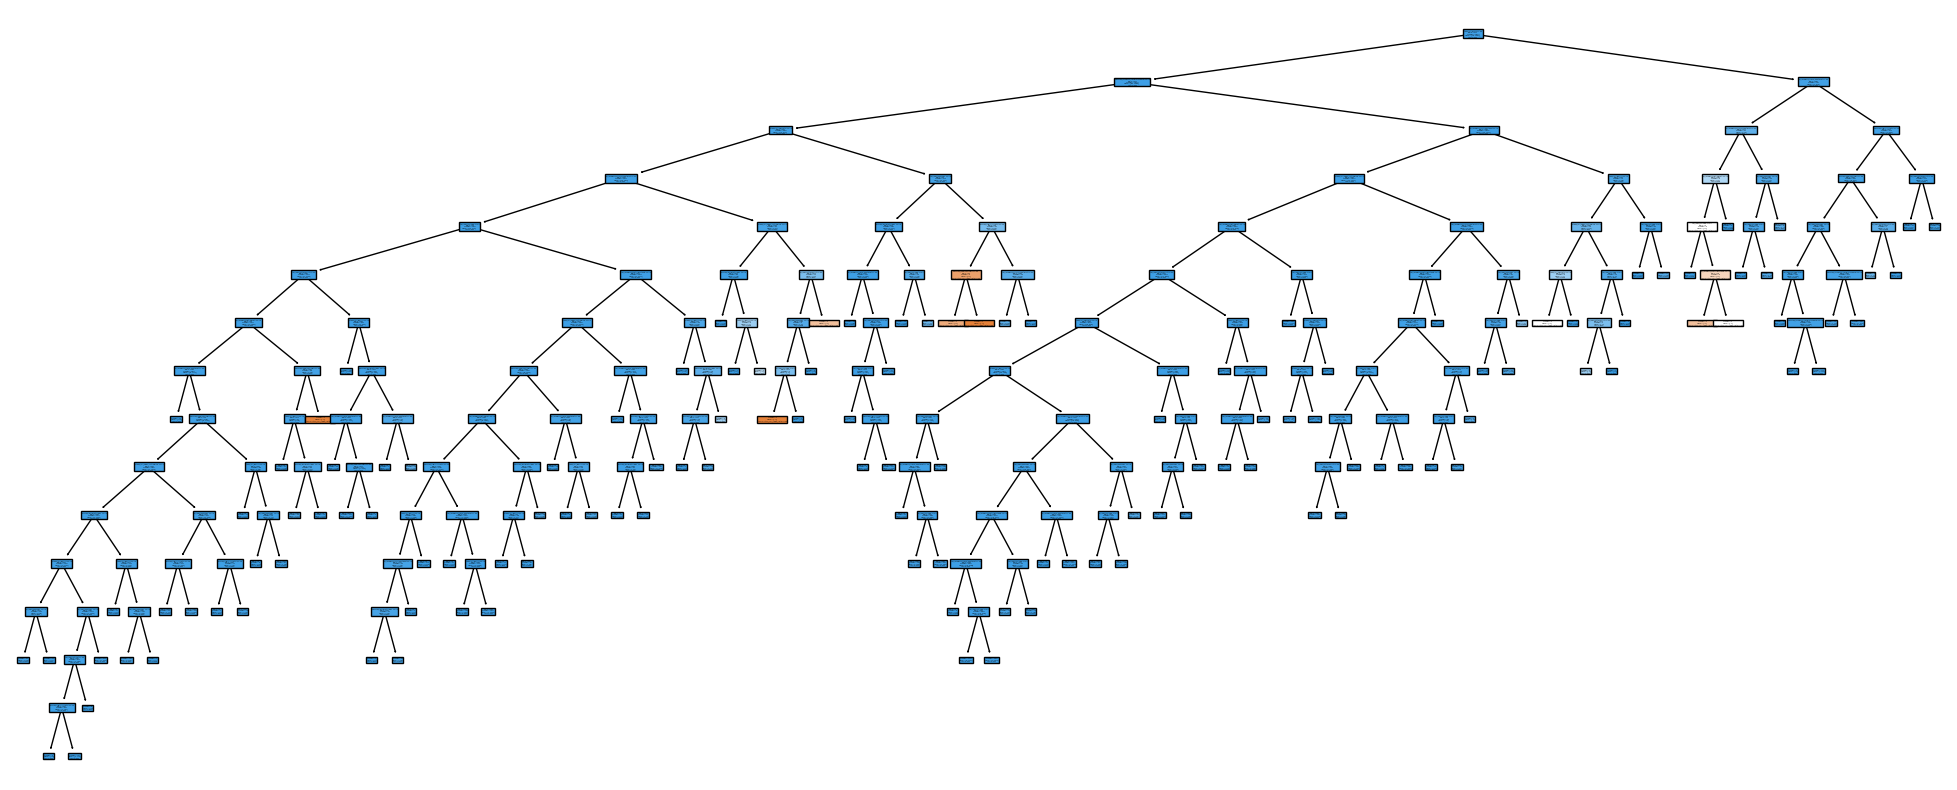

In [82]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['estado_civil_Single / not married', 'mau'],
          feature_names=X.columns);

C:\Users\WorkStation\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


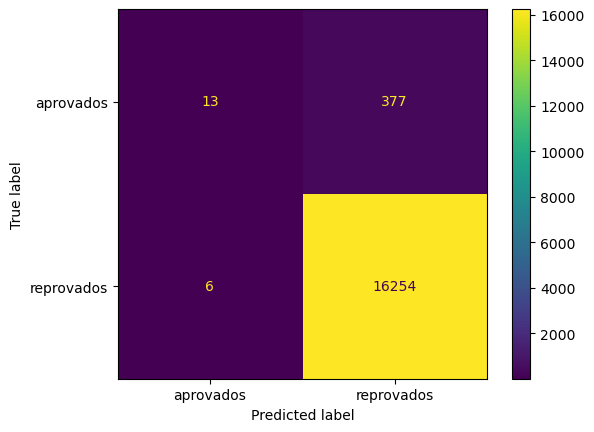

In [85]:
plot_confusion_matrix(clf, X, y, display_labels=['aprovados', 'reprovados']);

In [86]:
predict = clf.predict(X)

In [87]:
accuracy_score(y, predict)

0.976996996996997

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [94]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_test, y_test)

In [95]:
teste = clf.predict(X_test)
teste

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

C:\Users\WorkStation\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


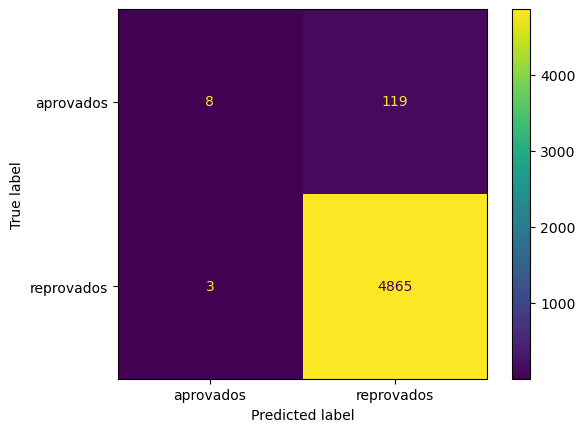

In [89]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovados', 'reprovados']);

In [97]:
accuracy_score(y_test, teste)

0.9755755755755756

In [102]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_test, y_test)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9745745745745745

C:\Users\WorkStation\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


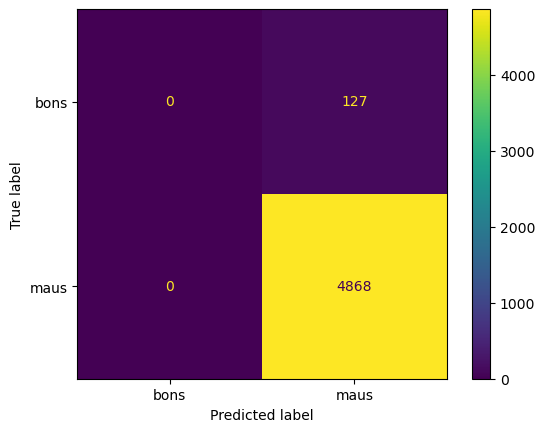

In [103]:
plot_confusion_matrix(clf,X_test, y_test, display_labels=['bons', 'maus']);

In [104]:
print('4868 foram classificados como maus')

4868 foram classificados como maus
